### Helper methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

### Process

In [2]:
# read in
data = pd.read_csv('../raw/TCGA-PANCAN-HiSeq-801x20531/data.csv',
                   index_col=0)
label = pd.read_csv('../raw/TCGA-PANCAN-HiSeq-801x20531/labels.csv',
                    index_col=0)

/home/daixiaoyunLab/gongyuntao/miniforge3/envs/ngs/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Test accuracy = 1.0000


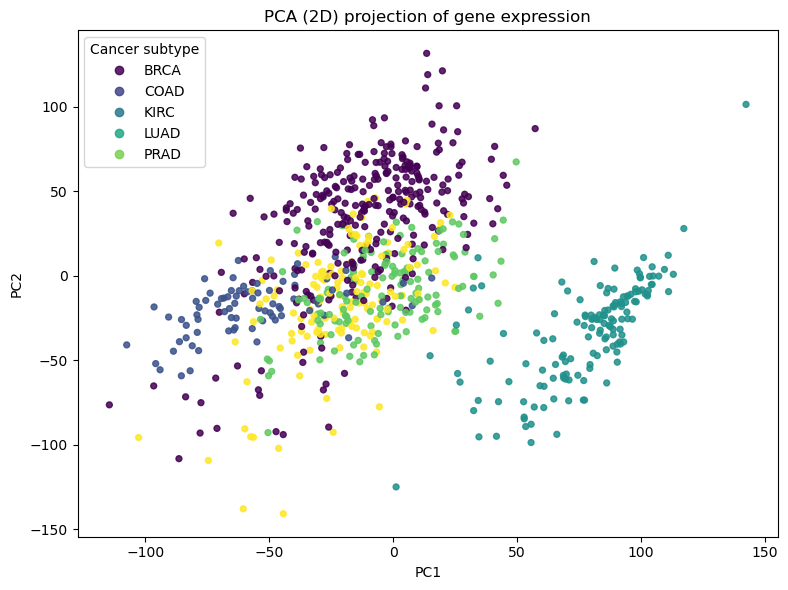

In [3]:
y = label["Class"].copy()

common = data.index.intersection(y.index)
X = data.loc[common]
y = y.loc[common]


# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=0,
    stratify=y
)

# LogisticRegression
clf = Pipeline(steps=[
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("lr", LogisticRegression(
        solver="saga",
        penalty="l2",
        max_iter=5000,
        n_jobs=-1,
        multi_class="auto"
    ))
])

clf.fit(X_train, y_train)

# Accuracy
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy = {acc:.4f}")

# PCA
pca_pipe = Pipeline(steps=[
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("pca", PCA(n_components=2, random_state=0))
])

X_2d = pca_pipe.fit_transform(X)

le = LabelEncoder()
y_enc = le.fit_transform(y)

plt.figure(figsize=(8, 6))
sc = plt.scatter(
    X_2d[:, 0], X_2d[:, 1],
    c=y_enc,
    s=18,
    alpha=0.85
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2D) projection of gene expression")

handles, _ = sc.legend_elements(num=len(le.classes_))
plt.legend(handles, le.classes_, title="Cancer subtype", loc="best", frameon=True)

plt.tight_layout()
plt.show()
